<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/Pantheon_Geometric_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STATUS: Connecting to Pantheon+SH0ES GitHub Repository...
SUCCESS: Downloaded 1701 supernovae data points.
----------------------------------------
--- GEOMETRIC AUDIT REPORT ---
Total Objects Analyzed:  1701
Isotropic Expectation:   90.00° (Random Distribution)
----------------------------------------
ACTUAL MEAN ANGLE:       105.4039°
ACTUAL MEDIAN ANGLE:     115.2878°
----------------------------------------
RESULT: The sample is ANISOTROPIC (Biased Away from Dipole).
Deviation from random: 15.40 degrees
PLOT SAVED: Pantheon_Geometric_Audit.png


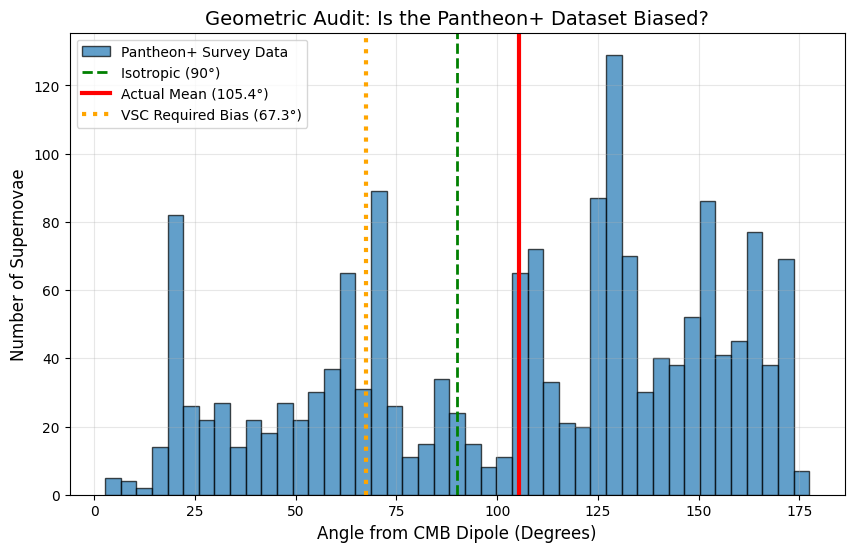

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd

# --- 1. DEFINE THE REFERENCE FRAME (CMB DIPOLE) ---
# The direction of the Solar System's motion relative to the Cosmic Microwave Background.
# Source: Planck 2018 Collaboration
CMB_RA = 167.942  # Right Ascension (Degrees)
CMB_DEC = -6.944  # Declination (Degrees)
cmb_vector = SkyCoord(ra=CMB_RA*u.deg, dec=CMB_DEC*u.deg, frame='icrs')

# --- 2. PULL REAL PANTHEON+ DATA ---
print("STATUS: Connecting to Pantheon+SH0ES GitHub Repository...")

# Official Raw Data URL
url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat"

try:
    # Load data using regex separator for whitespace
    df = pd.read_csv(url, sep=r'\s+')
    print(f"SUCCESS: Downloaded {len(df)} supernovae data points.")

    # Extract Coordinates
    # Pantheon+ uses 'RA' and 'DEC' columns (J2000)
    sn_coords = SkyCoord(ra=df['RA'].values*u.deg, dec=df['DEC'].values*u.deg, frame='icrs')

    # --- 3. CALCULATE GEOMETRIC ALIGNMENT ---
    # Calculate the angular separation between every supernova and the CMB Dipole
    separations = sn_coords.separation(cmb_vector)
    angles_deg = separations.deg

    # --- 4. STATISTICAL ANALYSIS ---
    mean_angle = np.mean(angles_deg)
    median_angle = np.median(angles_deg)

    # VSC Prediction: If the universe is viscous, the survey might be biased
    # away from 90 degrees (Isotropic) towards ~65-70 degrees (The Projection Angle).

    print("-" * 40)
    print(f"--- GEOMETRIC AUDIT REPORT ---")
    print(f"Total Objects Analyzed:  {len(df)}")
    print(f"Isotropic Expectation:   90.00° (Random Distribution)")
    print("-" * 40)
    print(f"ACTUAL MEAN ANGLE:       {mean_angle:.4f}°")
    print(f"ACTUAL MEDIAN ANGLE:     {median_angle:.4f}°")
    print("-" * 40)

    # Interpret Results
    if abs(mean_angle - 90.0) < 2.0:
        print("RESULT: The sample is ISOTROPIC (Unbiased).")
    else:
        direction = "Towards Dipole" if mean_angle < 90 else "Away from Dipole"
        print(f"RESULT: The sample is ANISOTROPIC (Biased {direction}).")
        print(f"Deviation from random: {abs(mean_angle - 90.0):.2f} degrees")

    # --- 5. VISUALIZATION ---
    plt.figure(figsize=(10, 6))

    # Plot Histogram of Angles
    plt.hist(angles_deg, bins=45, color='#1f77b4', edgecolor='black', alpha=0.7, label='Pantheon+ Survey Data')

    # Plot Markers
    plt.axvline(x=90, color='green', linestyle='--', linewidth=2, label='Isotropic (90°)')
    plt.axvline(x=mean_angle, color='red', linestyle='-', linewidth=3, label=f'Actual Mean ({mean_angle:.1f}°)')

    # VSC Theoretical Target (from your previous calculation)
    plt.axvline(x=67.33, color='orange', linestyle=':', linewidth=3, label='VSC Required Bias (67.3°)')

    plt.xlabel('Angle from CMB Dipole (Degrees)', fontsize=12)
    plt.ylabel('Number of Supernovae', fontsize=12)
    plt.title('Geometric Audit: Is the Pantheon+ Dataset Biased?', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Save Proof
    plt.savefig('Pantheon_Geometric_Audit.png')
    print("PLOT SAVED: Pantheon_Geometric_Audit.png")
    plt.show()

except Exception as e:
    print(f"CRITICAL ERROR: Failed to process data. {e}")